In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
%ls output_csvfile/output_ring

block_ring_128processors.csv  nonblock_ring_128processors.csv
block_ring_16processors.csv   nonblock_ring_16processors.csv
block_ring_256processors.csv  nonblock_ring_256processors.csv
block_ring_2processors.csv    nonblock_ring_2processors.csv
block_ring_32processors.csv   nonblock_ring_32processors.csv
block_ring_4processors.csv    nonblock_ring_4processors.csv
block_ring_64processors.csv   nonblock_ring_64processors.csv
block_ring_8processors.csv    nonblock_ring_8processors.csv


In [74]:
dfs = []
for i in range(1, 9):
    dfs.append(pd.read_csv("output_csvfile/output_ring/block_ring_%dprocessors.csv" % 2 ** i))
    dfs[i - 1]["Processes"] = 2 ** i

total_df = pd.concat(dfs)
#display(total_df)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

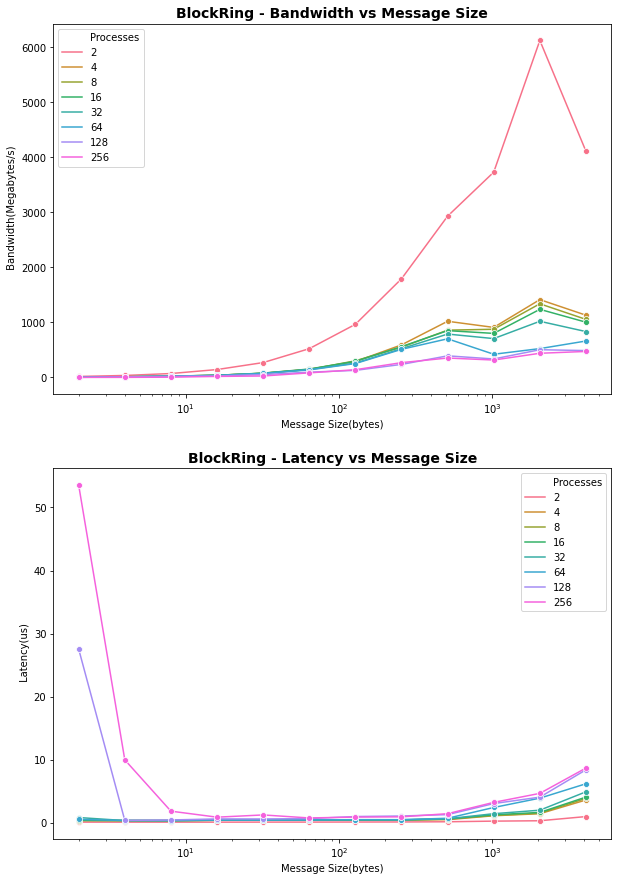

In [79]:
# PLOT Block Ring
fig, ax = plt.subplots(2, 1,figsize=(10,15))

# define a more distinctable color palette
palette = sns.color_palette("husl", n_colors=total_df['Processes'].nunique())

sns.lineplot(data=total_df, ax=ax[0], x="Message Size(bytes)", y=" Bandwidth(Megabytes/s)", hue="Processes", marker='o', palette=palette)
ax[0].set_xscale('log')
ax[0].set_title("BlockRing - Bandwidth vs Message Size", fontsize=14, fontweight='bold')


sns.lineplot(data=total_df, ax=ax[1], x="Message Size(bytes)", y=" Latency(us)", hue="Processes", marker='o', palette=palette)
ax[1].set_xscale('log')
ax[1].set_title("BlockRing - Latency vs Message Size", fontsize=14, fontweight='bold')

plt.tight_layout

In [ ]:
dfs_nblock = []
for i in range(1, 9):
    dfs_nblock.append(pd.read_csv("output_csvfile/output_ring/nonblock_ring_%dprocessors.csv" % 2 ** i))
    dfs_nblock[i - 1]["Processes"] = 2 ** i

total_df_nblock = pd.concat(dfs_nblock)
#display(total_df)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

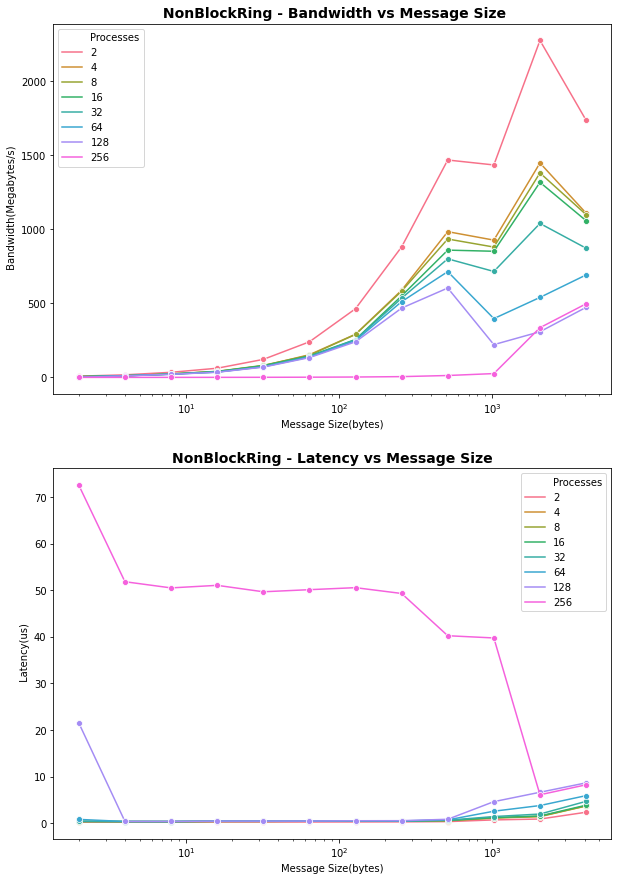

In [82]:
# PLOT NonBlock Ring
fig, ax = plt.subplots(2, 1,figsize=(10,15))

sns.lineplot(data=total_df_nblock, ax=ax[0], x="Message Size(bytes)", y=" Bandwidth(Megabytes/s)", hue="Processes", marker='o', palette=palette)
ax[0].set_xscale('log')
ax[0].set_title(" NonBlockRing - Bandwidth vs Message Size", fontsize=14, fontweight='bold')


sns.lineplot(data=total_df_nblock, ax=ax[1], x="Message Size(bytes)", y=" Latency(us)", hue="Processes", marker='o', palette=palette)
ax[1].set_xscale('log')
ax[1].set_title("NonBlockRing - Latency vs Message Size", fontsize=14, fontweight='bold')

plt.tight_layout